In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   

   koi_time0bk_err1  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0          0.003520  ...             -81      4.467           0.064   
1          0.000581  ...            -176      4.544           0.044   
2          0.000115  ...            -174      4.564           0.053   
3          0.001130  ...            -211      4.438           0.070   
4          0.001900  ...            -232      4.486           0.054   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  

[5 rows x 41 columns]

In [11]:
selected_features = df[['koi_disposition', 'koi_period']]
selected_features.head()

koi_disposition  koi_period
0       CONFIRMED   54.418383
1  FALSE POSITIVE   19.899140
2  FALSE POSITIVE    1.736952
3       CONFIRMED    2.525592
4       CONFIRMED    4.134435

# Create a Train Test Split
Use koi_disposition for the y values

In [12]:
target = selected_features.koi_disposition
data = selected_features.drop("koi_disposition", axis = 1)
feature_names = data.columns
data.head()

koi_period
0   54.418383
1   19.899140
2    1.736952
3    2.525592
4    4.134435

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,random_state=42)

In [14]:
X_train.head()

koi_period
6122    6.768901
6370    0.733726
2879    7.652707
107     7.953547
29      4.959319

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.457
k: 3, Train/Test Score: 0.722/0.460
k: 5, Train/Test Score: 0.656/0.474
k: 7, Train/Test Score: 0.637/0.483
k: 9, Train/Test Score: 0.611/0.483
k: 11, Train/Test Score: 0.599/0.490
k: 13, Train/Test Score: 0.589/0.491
k: 15, Train/Test Score: 0.586/0.485
k: 17, Train/Test Score: 0.582/0.483
k: 19, Train/Test Score: 0.576/0.496


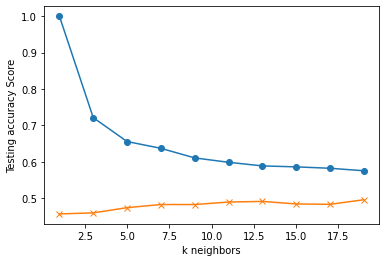

In [17]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
# Note that k: 18 seems to be the best choice for this dataset

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=18 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=18 Test Acc: 0.491


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [33]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,5,11,18],
              'weights' : ["uniform", "distance"],
              'metric' : ['euclidean', 'manhattan']}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [34]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.469, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.498, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.491, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.483, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.503, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.480, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.491, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.492, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.490, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.504, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.468, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.486, to

[CV]  metric=manhattan, n_neighbors=11, weights=uniform, score=0.492, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, score=0.510, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, score=0.513, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, score=0.488, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, score=0.502, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, score=0.511, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, score=0.5

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.2s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 18],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
0.5117330936770024


# Save the Model

In [36]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_3.sav'
joblib.dump(knn, filename)

['model_3.sav']